In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import pandas as pd

Welcome to JupyROOT 6.24/04


In [2]:
monitoring_recon_filepath_pipkmks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root'
monitoring_recon_filepath_pimkpks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pimkpks_s18_042050_042059_monitoring.root'

pipkmks_file = ROOT.TFile(monitoring_recon_filepath_pipkmks, 'READ')
pimkpks_file = ROOT.TFile(monitoring_recon_filepath_pimkpks, 'READ')

In [3]:
def explore_directory(directory, depth=0):
    indent = "  " * depth
    print(f"{indent}Directory: {directory.GetName()}")
    
    keys = directory.GetListOfKeys()
    for key in keys:
        obj = key.ReadObj()
        if isinstance(obj, ROOT.TDirectory):
            explore_directory(obj, depth + 1)
        else:
            print(f"{indent}  {obj.GetName()}")

In [4]:
explore_directory(pipkmks_file)

Directory: /w/halld-scshelf2101/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root
  Directory: Independent
    Directory: Hist_NumReconstructedObjects
      NumHighLevelObjects
      NumChargedTracks
      NumPosChargedTracks
      NumNegChargedTracks
      NumTimeBasedTracks
      NumPosTimeBasedTracks
      NumNegTimeBasedTracks
      NumBeamPhotons
      NumFCALShowers
      NumCCALShowers
      NumBCALShowers
      NumNeutralShowers
      NumTOFPoints
      NumSCHits
      NumTrackBCALMatches
      NumTrackFCALMatches
      NumTrackTOFMatches
      NumTrackSCMatches
    Directory: Hist_Reconstruction
      Directory: Tracking
        Directory: q-
          PVsTheta_TimeBased_q-
          PVsTheta_TimeBased_GoodTrackFOM_q-
          PVsTheta_TimeBased_LowTrackFOM_q-
          PVsTheta_TimeBased_HighTrackFOM_q-
        Directory: q+
          PVsTheta_TimeBased_q+
          PVsTheta_TimeBased_GoodTrackFOM_q+
          PVsTheta_TimeBased_LowTrackFOM_q+
    

In [5]:
hist_string = '{}__ks_pippim__B4_M16/Hist_PID/{}/{}'

In [6]:
particle_dict = {
    'kaon': ('K-', 'K+'),
    'pion': ('Pi+', 'Pi-'),
}

In [7]:
c1 = ROOT.TCanvas("c1", "c1", 900, 800)
c1.Divide(2, 2)
c2 = ROOT.TCanvas("c2", "c2", 900, 800)
c2.Divide(2, 2)

In [8]:
hist_kaon_tof_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['kaon'][0], 'TOF/DeltaTVsP'))
hist_kaon_tof_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['kaon'][1], 'TOF/DeltaTVsP'))
hist_kaon_cdc_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['kaon'][0], 'CDC/dEdXVsP_Amp'))
hist_kaon_cdc_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['kaon'][1], 'CDC/dEdXVsP_Amp'))

In [9]:
hist_pion_tof_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['pion'][0], 'TOF/DeltaTVsP'))
hist_pion_tof_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['pion'][1], 'TOF/DeltaTVsP'))
hist_pion_cdc_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['pion'][0], 'CDC/dEdXVsP_Amp'))
hist_pion_cdc_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['pion'][1], 'CDC/dEdXVsP_Amp'))

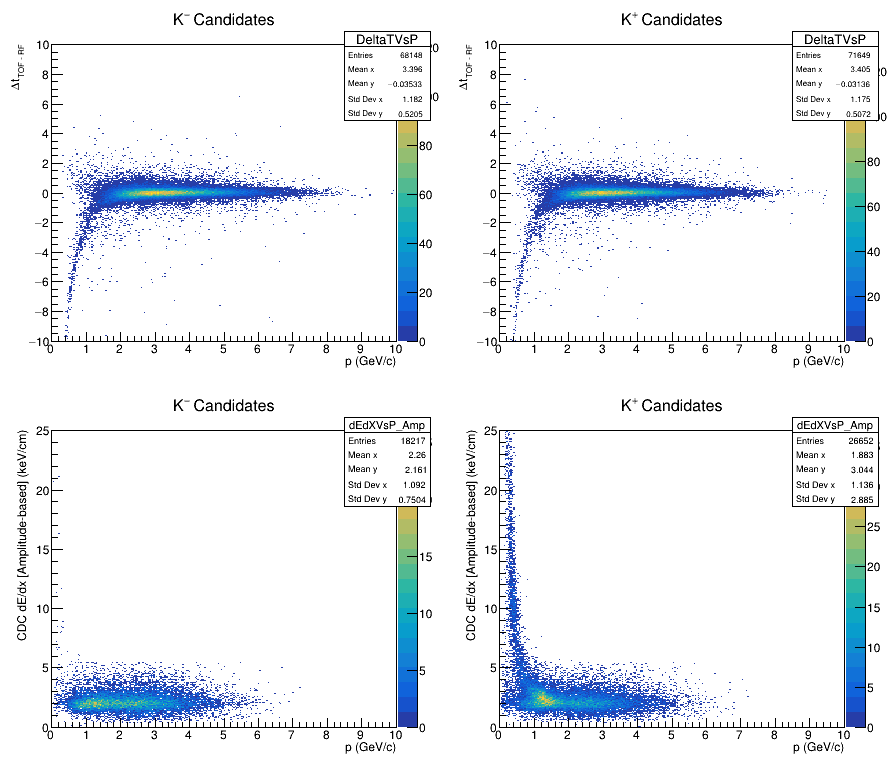

In [10]:
c1.cd(1)
hist_kaon_tof_pipkmks.Draw('colz')
c1.cd(2)
hist_kaon_tof_pimkpks.Draw('colz')
c1.cd(3)
hist_kaon_cdc_pipkmks.Draw('colz')
c1.cd(4)
hist_kaon_cdc_pimkpks.Draw('colz')
c1.Draw()

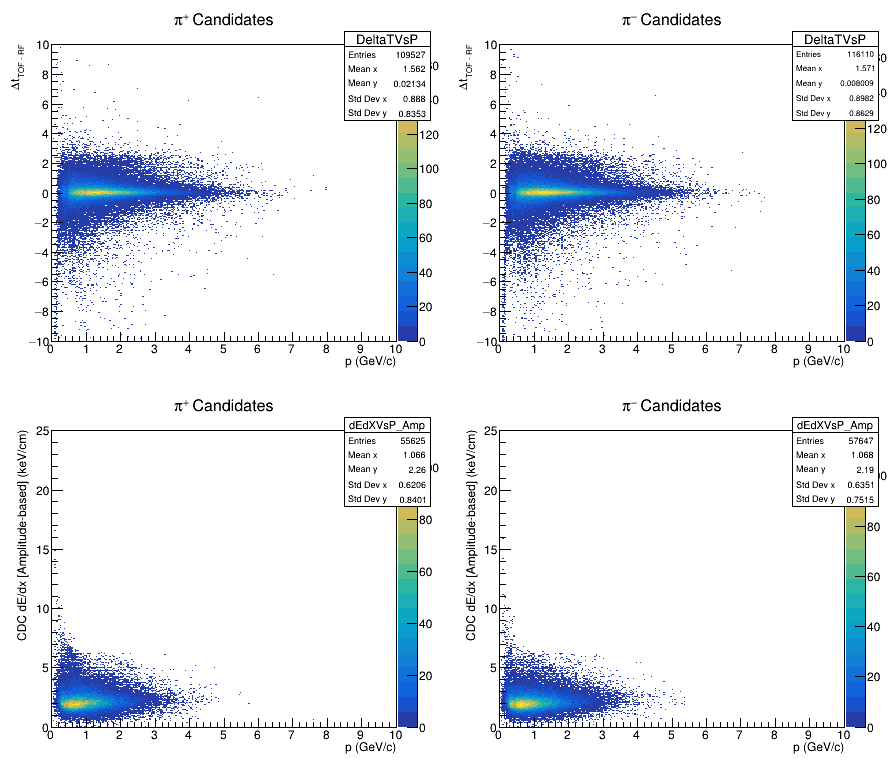

In [11]:
c2.cd(1)
hist_pion_tof_pipkmks.Draw('colz')
c2.cd(2)
hist_pion_tof_pimkpks.Draw('colz')
c2.cd(3)
hist_pion_cdc_pipkmks.Draw('colz')
c2.cd(4)
hist_pion_cdc_pimkpks.Draw('colz')
c2.Draw()

In [12]:
run_period = 'spring'
data_type = 'data'
recon_df_pipkmks = tools.get_dataframe('pipkmks', run_period, data_type)
recon_df_pimkpks = tools.get_dataframe('pimkpks', run_period, data_type)


In [13]:
recon_df_pipkmks = recon_df_pipkmks.Filter('pipkmks_m > 1.24 && pipkmks_m < 1.35')
recon_df_pimkpks = recon_df_pimkpks.Filter('pimkpks_m > 1.24 && pimkpks_m < 1.35')

In [14]:
hist_rf_time = recon_df_pipkmks.Histo1D('rf_time')


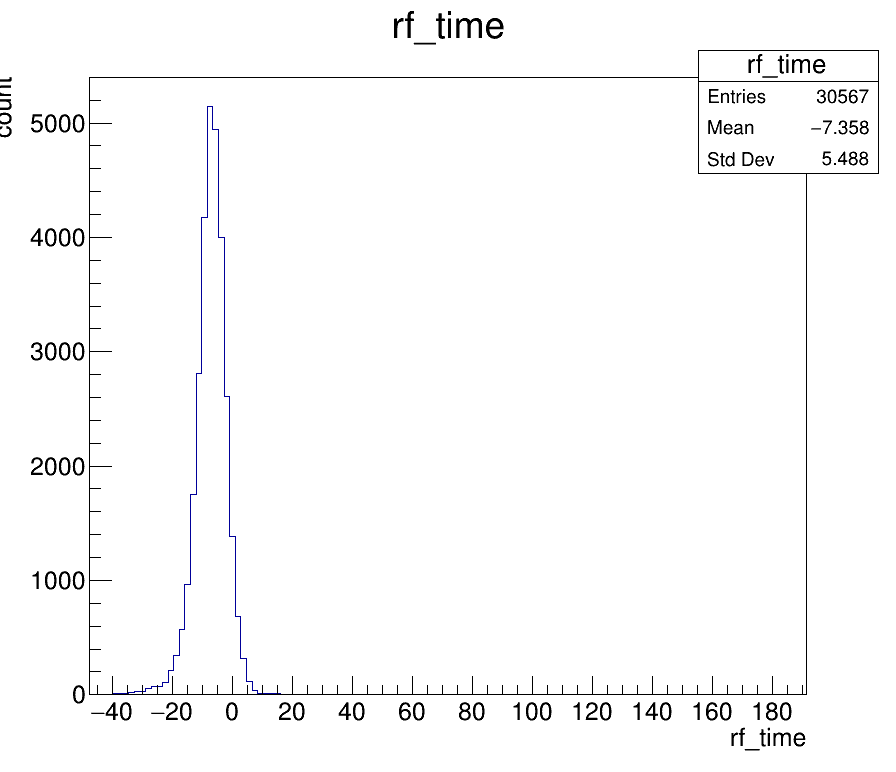

In [15]:
canvas = ROOT.TCanvas("canvas", "canvas", 900, 800)
canvas.cd()
hist_rf_time.Draw()
canvas.Draw()

In [16]:
print(recon_df_pipkmks.GetColumnNames())

{ "p_pt", "p_p", "ks_px", "ks_py", "ks_pz", "ks_E", "ks_m", "ks_px_measured", "ks_py_measured", "ks_pz_measured", "ks_E_measured", "ks_m_measured", "mxpx_ppipkmks", "mxpy_ppipkmks", "mxpz_ppipkmks", "mxe_ppipkmks", "mx2_ppipkmks", "ppip_px", "ppip_py", "ppip_pz", "ppip_E", "ppip_m", "missing_px", "missing_py", "missing_pz", "missing_E", "missing_m", "kmp_px", "kmp_py", "kmp_pz", "kmp_E", "kmp_m", "ksp_px", "ksp_py", "ksp_pz", "ksp_E", "ksp_m", "kspip_px", "kspip_py", "kspip_pz", "kspip_E", "kspip_m", "kmpip_px", "kmpip_py", "kmpip_pz", "kmpip_E", "kmpip_m", "pipkmks_px", "pipkmks_py", "pipkmks_pz", "pipkmks_E", "pipkmks_px_measured", "pipkmks_py_measured", "pipkmks_pz_measured", "pipkmks_pt", "pipkmks_p_pt_diff", "pipkmks_m", "kmks_px", "kmks_py", "kmks_pz", "kmks_E", "kmks_m", "e_bin", "t_bin", "run", "event", "trigbits", "rftime", "kin_chisq", "kin_ndf", "beam_beamid", "beam_x4_meas", "beam_p4_meas", "beam_x4_kin", "beam_p4_kin", "pip1_trkid", "pip1_x4_meas", "pip1_p4_meas", "pip1_x4

In [17]:
recon_df_pipkmks = recon_df_pipkmks.Define('propogated_rf_time', 'rf_time + (km_x4_kin.Z() - 65)/29.9792458')
recon_df_pimkpks = recon_df_pimkpks.Define('propogated_rf_time', 'rf_time + (kp_x4_kin.Z() - 65)/29.9792458')
recon_df_pipkmks = recon_df_pipkmks.Define('kaon_time', 'km_x4_kin.T()')
recon_df_pipkmks = recon_df_pipkmks.Define('delta_t', 'kaon_time - propogated_rf_time')
recon_df_pimkpks = recon_df_pimkpks.Define('kaon_time', 'kp_x4_kin.T()')
recon_df_pimkpks = recon_df_pimkpks.Define('delta_t', 'kaon_time - propogated_rf_time')
recon_df_pipkmks = recon_df_pipkmks.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
recon_df_pimkpks = recon_df_pimkpks.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')
recon_df_pipkmks = recon_df_pipkmks.Define('scaled_cdc_km_dedx', 'km_dedx_cdc * 1E6')
recon_df_pimkpks = recon_df_pimkpks.Define('scaled_cdc_kp_dedx', 'kp_dedx_cdc * 1E6')


In [24]:
hist_deltat_vs_p_km = recon_df_pipkmks.Filter('km_dedx_tof > 0').Histo2D(('deltat_vs_p_km', '#Delta(t) vs #vec{p} for K^{-} After Event Selection', 500, 0, 10, 500, -10, 10), 'km_p', 'delta_t')
# hist_deltat_vs_p_km = recon_df_pipkmks.Filter('km_ebcal > 0').Histo2D(('deltat_vs_p_km', '#Delta(t) vs #vec{p} for K^{-} After Event Selection', 500, 0, 10, 500, -10, 10), 'km_p', 'delta_t')
hist_deltat_vs_p_kp = recon_df_pimkpks.Filter('kp_dedx_tof > 0').Histo2D(('deltat_vs_p_kp', '#Delta(t) vs #vec{p} for K^{+} After Event Selection', 500, 0, 10, 500, -10, 10), 'kp_p', 'delta_t')
# hist_deltat_vs_p_kp = recon_df_pimkpks.Filter('kp_ebcal > 0').Histo2D(('deltat_vs_p_kp', '#Delta(t) vs #vec{p} for K^{+} After Event Selection', 500, 0, 10, 500, -10, 10), 'kp_p', 'delta_t')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


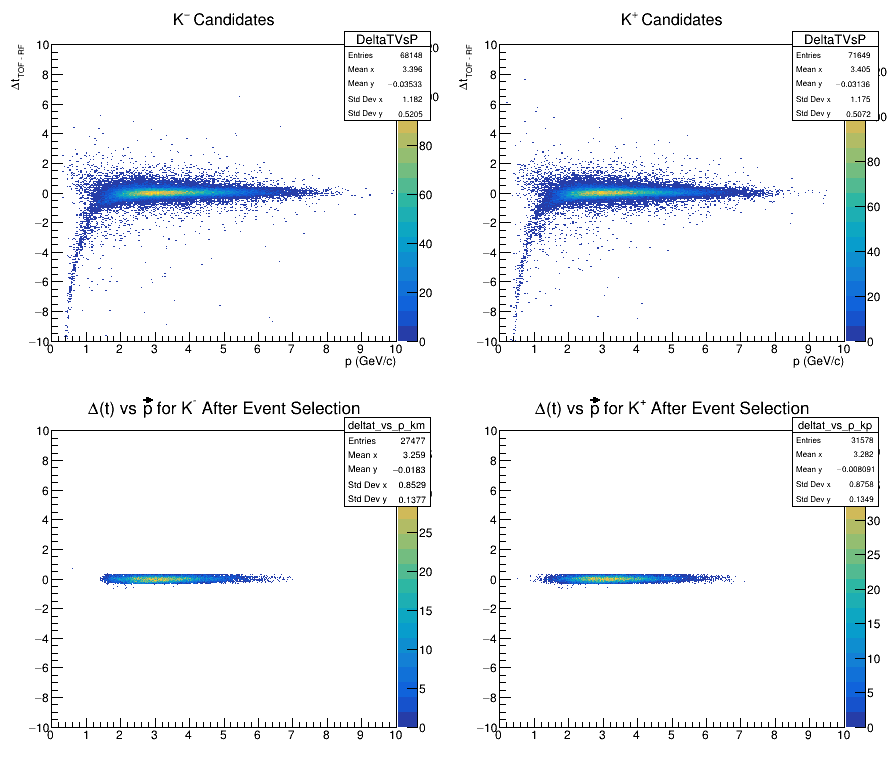

In [25]:
c = ROOT.TCanvas("c", "c", 900, 800)
c.Divide(2, 2)
c.cd(1)
hist_kaon_tof_pipkmks.Draw('colz')
c.cd(2)
hist_kaon_tof_pimkpks.Draw('colz')
c.cd(3)
hist_deltat_vs_p_km.Draw('colz')
c.cd(4)
hist_deltat_vs_p_kp.Draw('colz')
c.Draw()

In [26]:
hist_cdc_dedx_vs_p_km = recon_df_pipkmks.Filter('km_dedx_cdc > 0.0').Histo2D(
    ('cdc_dedx_vs_p_km', 'CDC dE/dx vs #vec{p} for K^{-} After Event Selection', 500, 0, 10, 250, 0, 25), 'km_p', 'scaled_cdc_km_dedx')
hist_cdc_dedx_vs_p_kp = recon_df_pimkpks.Filter('kp_dedx_cdc > 0.0').Histo2D(
    ('cdc_dedx_vs_p_kp', 'CDC dE/dx vs #vec{p} for K^{+} After Event Selection', 500, 0, 10, 250, 0, 25), 'kp_p', 'scaled_cdc_kp_dedx')


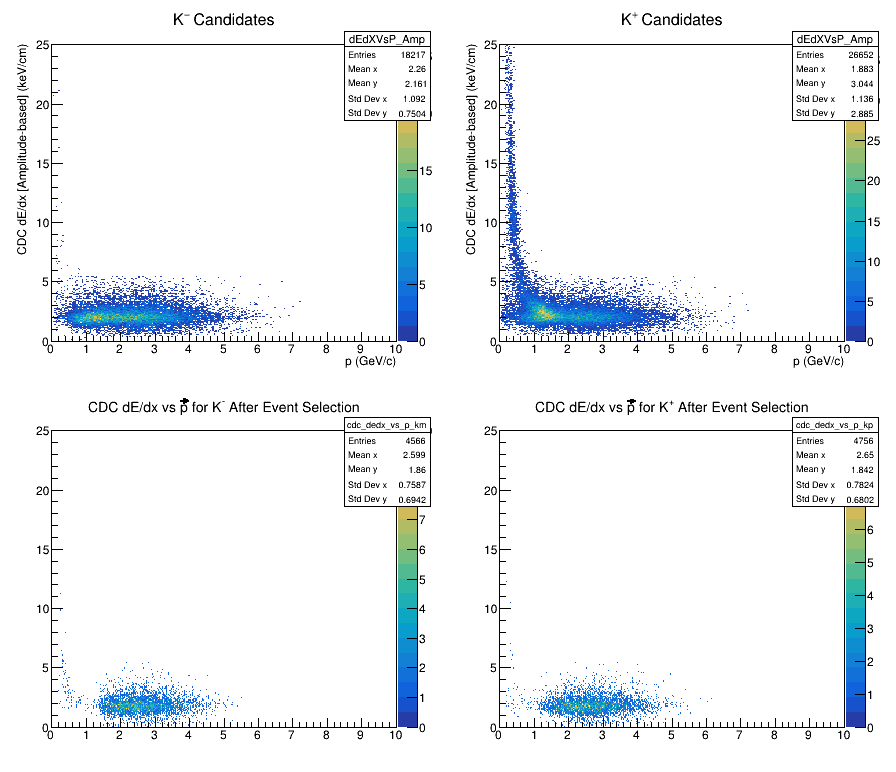

In [27]:
c.cd(1)
hist_kaon_cdc_pipkmks.Draw('colz')
c.cd(2)
hist_kaon_cdc_pimkpks.Draw('colz')
c.cd(3)
hist_cdc_dedx_vs_p_km.Draw('colz')
c.cd(4)
hist_cdc_dedx_vs_p_kp.Draw('colz')
c.Draw()